<a href="https://colab.research.google.com/github/housemLassoued/ML-deployment/blob/main/Lumbar_Coordinate_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"housemlassoued","key":"d706f47444fe22b8a6c8bbacb53640a4"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d brendanartley/lumbar-coordinate-pretraining-dataset

Dataset URL: https://www.kaggle.com/datasets/brendanartley/lumbar-coordinate-pretraining-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 713M/717M [00:07<00:00, 75.8MB/s]
100% 717M/717M [00:07<00:00, 94.9MB/s]


In [7]:
!unzip lumbar-coordinate-pretraining-dataset.zip

Archive:  lumbar-coordinate-pretraining-dataset.zip
  inflating: coords_pretrain.csv     
  inflating: coords_rsna_improved.csv  
  inflating: data/processed_lsd/0001.npy  
  inflating: data/processed_lsd/0002.npy  
  inflating: data/processed_lsd/0003.npy  
  inflating: data/processed_lsd/0004.npy  
  inflating: data/processed_lsd/0005.npy  
  inflating: data/processed_lsd/0006.npy  
  inflating: data/processed_lsd/0007.npy  
  inflating: data/processed_lsd/0008.npy  
  inflating: data/processed_lsd/0009.npy  
  inflating: data/processed_lsd/0010.npy  
  inflating: data/processed_lsd/0011.npy  
  inflating: data/processed_lsd/0012.npy  
  inflating: data/processed_lsd/0013.npy  
  inflating: data/processed_lsd/0014.npy  
  inflating: data/processed_lsd/0015.npy  
  inflating: data/processed_lsd/0016.npy  
  inflating: data/processed_lsd/0017.npy  
  inflating: data/processed_lsd/0019.npy  
  inflating: data/processed_lsd/0020.npy  
  inflating: data/processed_lsd/0021.npy  
  inflatin

In [8]:
import pandas as pd


In [9]:
df_key=pd.read_csv('/content/coords_pretrain.csv')

In [10]:
df_key.head(11)

,filename,source,x,y,level,relative_x,relative_y
0,1_t2.jpg,spider,139,175,L5/S1,0.542969,0.683594
1,1_t2.jpg,spider,133,157,L4/L5,0.519531,0.613281
2,1_t2.jpg,spider,132,131,L3/L4,0.515625,0.511719
3,1_t2.jpg,spider,131,102,L2/L3,0.511719,0.398438
4,1_t2.jpg,spider,134,84,L1/L2,0.523438,0.328125
5,2_t2.jpg,spider,143,179,L5/S1,0.558594,0.699219
6,2_t2.jpg,spider,129,154,L4/L5,0.503906,0.601562
7,2_t2.jpg,spider,123,125,L3/L4,0.480469,0.488281
8,2_t2.jpg,spider,123,91,L2/L3,0.480469,0.355469
9,2_t2.jpg,spider,127,59,L1/L2,0.496094,0.230469


In [11]:
df=pd.read_csv('/content/coords_rsna_improved.csv')

In [12]:
df.head()

,Unnamed: 0,series_id,relative_x,relative_y,condition,side,instance_number,study_id,level
0,0,10996,0.521148,0.325282,Left Neural Foraminal Narrowing,L,13,3996069892,L1/L2
1,1,10996,0.516856,0.319701,Right Neural Foraminal Narrowing,R,6,3996069892,L1/L2
2,2,10996,0.493773,0.400966,Left Neural Foraminal Narrowing,L,12,3996069892,L2/L3
3,3,10996,0.504032,0.385531,Right Neural Foraminal Narrowing,R,6,3996069892,L2/L3
4,4,10996,0.487331,0.475040,Left Neural Foraminal Narrowing,L,12,3996069892,L3/L4


In [13]:
data_processed_lsd_jpgs='/content/data/processed_lsd_jpgs'
data_processed_osf_jpgs='/content/data/processed_osf_jpgs'
data_processed_spider_jpgs='/content/data/processed_spider_jpgs'
data_processed_tseg_jpgs='/content/data/processed_tseg_jpgs'


In [14]:
from glob import glob
import os
files_lsd_jpgs=glob(data_processed_lsd_jpgs+'/*')
files_osf_jpgs=glob(data_processed_osf_jpgs+'/*')
files_spider_jpgs=glob(data_processed_spider_jpgs+'/*')
files_tseg_jpgs=glob(data_processed_tseg_jpgs+'/*')


In [32]:
import cv2
!pip install opencv-python

print(cv2.imread(files_lsd_jpgs[0]).shape)
print(cv2.imread(files_osf_jpgs[0]).shape)
print(cv2.imread(files_spider_jpgs[0]).shape)
print(cv2.imread(files_tseg_jpgs[0]).shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [15]:
print(len(files_lsd_jpgs))
print(len(files_osf_jpgs))
print(len(files_spider_jpgs))
print(len(files_tseg_jpgs))

515
34
210
478


In [33]:
files_lsd_jpgs_list=[]
files_osf_jpgs_list=[]
files_spider_jpgs_list=[]
files_tseg_jpgs_list=[]

for i in range(len(files_lsd_jpgs)):
  img=cv2.imread(files_lsd_jpgs[i])
  img=cv2.resize(img,(224,224))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  files_lsd_jpgs_list.append(img)
for i in range(len(files_osf_jpgs)):
  img=cv2.imread(files_osf_jpgs[i])
  img=cv2.resize(img,(224,224))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  files_osf_jpgs_list.append(img)
for i in range(len(files_spider_jpgs)):
  img=cv2.imread(files_spider_jpgs[i])
  img=cv2.resize(img,(224,224))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  files_spider_jpgs_list.append(img)
for i in range(len(files_tseg_jpgs)):
  img=cv2.imread(files_tseg_jpgs[i])
  img=cv2.resize(img,(224,224))
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  files_tseg_jpgs_list.append(img)

In [35]:
print(files_lsd_jpgs_list[0].shape)
print(files_osf_jpgs_list[0].shape)
print(files_spider_jpgs_list[0].shape)
print(files_tseg_jpgs_list[0].shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


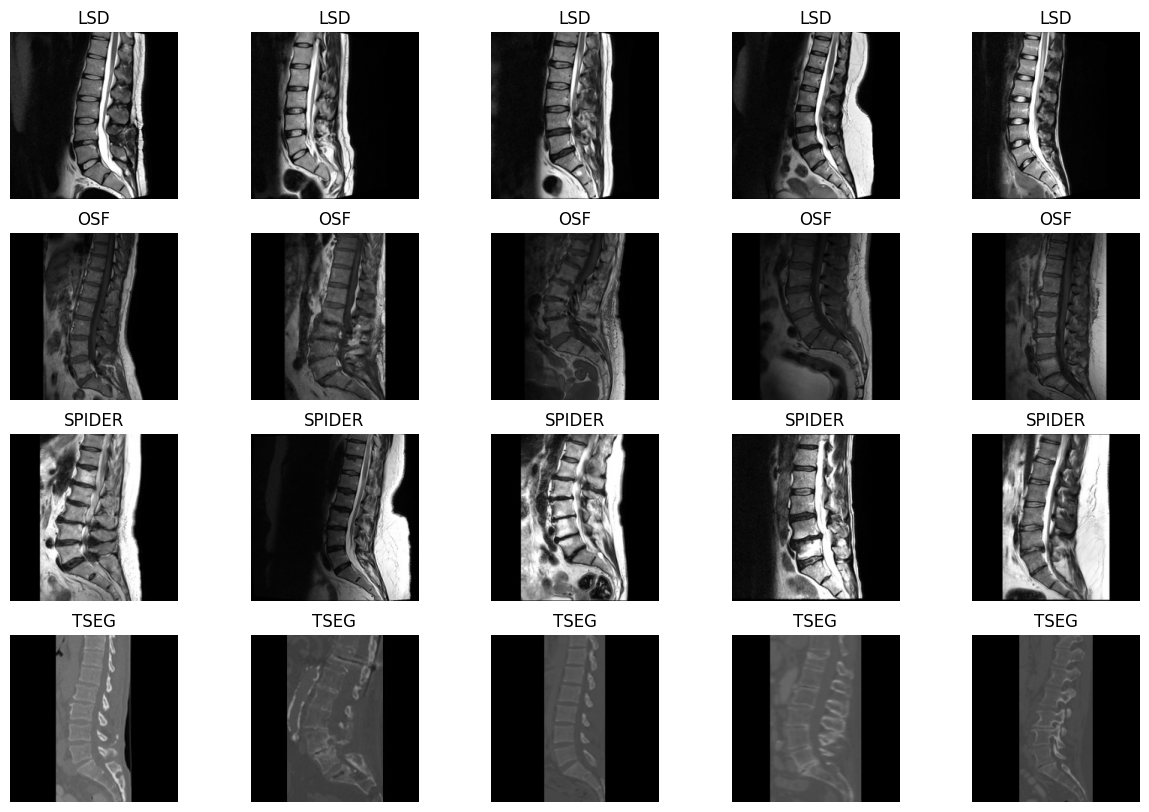

In [36]:
n_rows=4
n_col=5
import matplotlib.pyplot as plt
fig,axes=plt.subplots(n_rows,n_col,figsize=(15,10))
for j in range(n_col):
    axes[0][j].imshow(files_lsd_jpgs_list[j])
    axes[0][j].axis('off')
    axes[0][j].set_title('LSD')
    axes[1][j].imshow(files_osf_jpgs_list[j])
    axes[1][j].axis('off')
    axes[1][j].set_title('OSF')
    axes[2][j].imshow(files_spider_jpgs_list[j])
    axes[2][j].axis('off')
    axes[2][j].set_title('SPIDER')
    axes[3][j].imshow(files_tseg_jpgs_list[j])
    axes[3][j].axis('off')
    axes[3][j].set_title('TSEG')
plt.show()


In [37]:
processed_lsd='/content/data/processed_lsd'
processed_osf='/content/data/processed_osf'
processed_spider='/content/data/processed_spider'
processed_tseg='/content/data/processed_tseg'

In [38]:
files_lsd=glob(processed_lsd+'/*')
files_osf=glob(processed_osf+'/*')
files_spider=glob(processed_spider+'/*')
files_tseg=glob(processed_tseg+'/*')

In [39]:
print(len(files_lsd))
print(len(files_osf))
print(len(files_spider))
print(len(files_tseg))

515
34
211
478


In [40]:
all_images = files_lsd_jpgs_list + files_osf_jpgs_list + files_spider_jpgs_list + files_tseg_jpgs_list
labels_lsd = [0] * len(files_lsd_jpgs_list)
labels_osf = [1] * len(files_osf_jpgs_list)
labels_spider = [2] * len(files_spider_jpgs_list)
labels_tseg = [3] * len(files_tseg_jpgs_list)
all_labels = labels_lsd + labels_osf + labels_spider + labels_tseg

In [41]:
import numpy
all_images_np = np.array(all_images)
all_labels_np = np.array(all_labels)

In [42]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(
    all_images_np, all_labels_np, test_size=0.2, random_state=42, stratify=all_labels_np
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)


In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                       rotation_range=10,
                       width_shift_range=0.1,
                       height_shift_range=0.1,
                       shear_range=0.1,
                       zoom_range=0.1,
                       validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train_generator = train_datagen.flow(
    X_train, y_train, batch_size=32, shuffle=True
)
val_generator = val_datagen.flow(
    X_val, y_val, batch_size=32, shuffle=True
)
test_generator = test_datagen.flow(
    X_test, y_test, batch_size=32, shuffle=False
)

In [47]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 49,279,108 (187.98 MB)

 Trainable params: 49,225,988 (187.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [53]:
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
import tensorflow
early = tensorflow.keras.callbacks.EarlyStopping( patience=10,
                                          min_delta=0.001,
                                          restore_best_weights=True)

In [56]:
model.fit(train_generator, validation_data=val_generator, epochs=30, callbacks=[early])

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 224s 8s/step - accuracy: 0.7576 - loss: 1.9705 - val_accuracy: 0.9545 - val_loss: 0.1538
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 253s 8s/step - accuracy: 0.9456 - loss: 0.2383 - val_accuracy: 0.8687 - val_loss: 0.3073
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 270s 9s/step - accuracy: 0.9393 - loss: 0.2685 - val_accuracy: 0.9091 - val_loss: 0.3616
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 216s 9s/step - accuracy: 0.9353 - loss: 0.2709 - val_accuracy: 0.8737 - val_loss: 0.8604
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 259s 8s/step - accuracy: 0.9267 - loss: 0.3203 - val_accuracy: 0.9242 - val_loss: 0.2973
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 209s 8s/step - accuracy: 0.9398 - loss: 0.3061 - val_accuracy: 0.8939 - val_loss: 0.2976
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 269s 9s/step - accuracy: 0.9705 - loss: 0.0891 - val_accuracy: 0.9444 - val_loss: 0.1418
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 258s 8s/step - accuracy: 0.9337 - loss: 0.2023 - val_accuracy: 0.9444 - v

In [57]:
accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy[1]*100:.2f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 47s 6s/step - accuracy: 0.9680 - loss: 0.0881
Test accuracy: 95.97%


In [58]:
predictions = model.predict(test_generator)

8/8 ━━━━━━━━━━━━━━━━━━━━ 55s 6s/step


In [59]:
predicted_classes = np.argmax(predictions, axis=1)

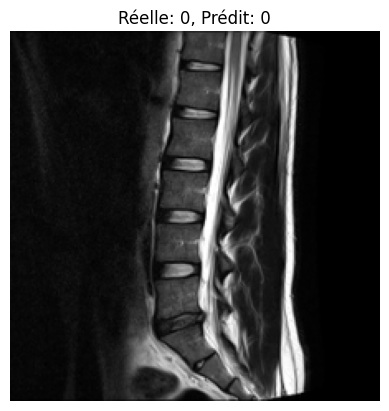

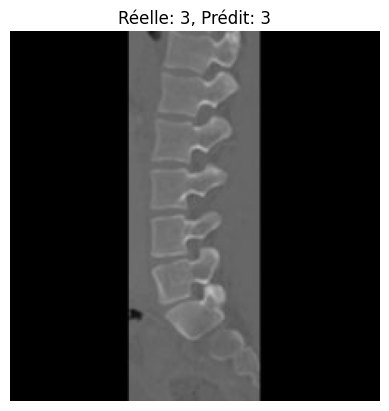

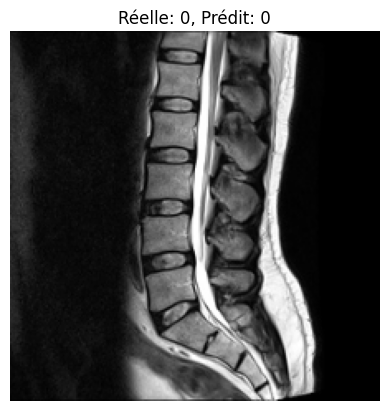

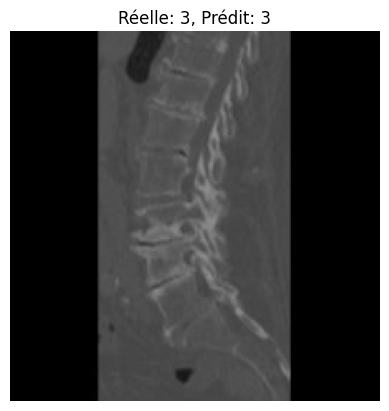

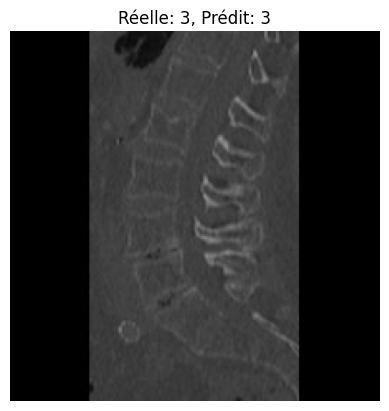

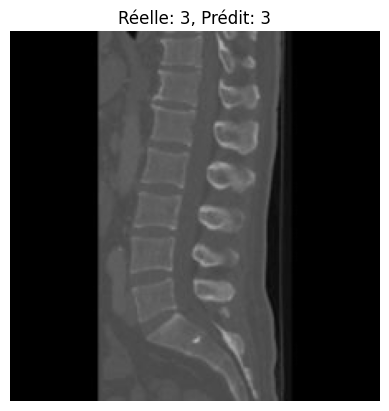

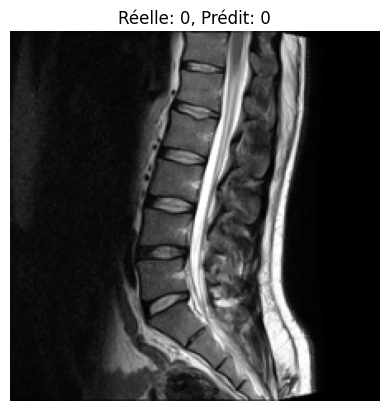

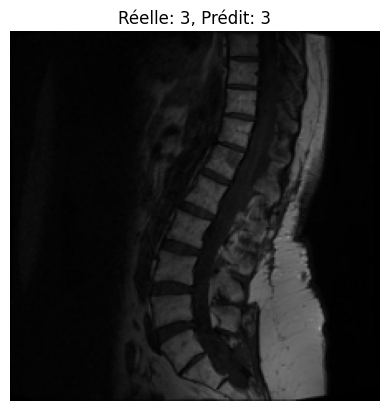

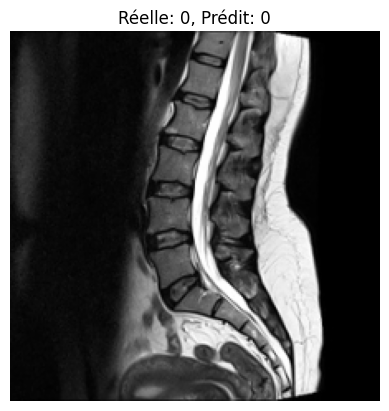

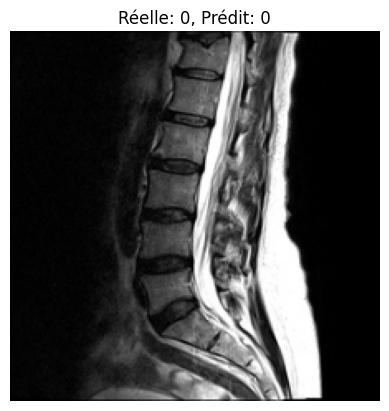

In [67]:

# Get the class indices from the original ImageDataGenerator.
class_labels = list(y_test) # Assuming original_test_generator is the ImageDataGenerator

# Reset the generator to its initial state
test_generator.reset()

# Get the first batch of test images and labels
test_images, true_classes = next(test_generator)

# Display the images with their true and predicted labels
for i in range(10):
    plt.imshow(test_images[i])
    plt.title(f"Réelle: {class_labels[true_classes[i]]}, Prédit: {class_labels[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()

In [71]:
from sklearn.metrics import classification_report, confusion_matrix


class_names = ['class_0', 'class_1', 'class_2', 'class_3']

print(classification_report(y_test, predicted_classes, target_names=class_names))




              precision    recall  f1-score   support

     class_0       0.94      1.00      0.97       103
     class_1       0.75      0.86      0.80         7
     class_2       1.00      0.83      0.91        42
     class_3       0.99      0.98      0.98        96

    accuracy                           0.96       248
   macro avg       0.92      0.92      0.92       248
weighted avg       0.96      0.96      0.96       248

